In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load and Split Data

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SML Dataset/Premier League matches.csv')  # Update this path

# Select features and target
features = df[['opponent', 'venue', 'captain', 'referee', 'formation']]
target = df['result']

# Encode categorical features and target
label_encoders = {}
for column in features.columns:
    le = LabelEncoder()
    features.loc[:, column] = le.fit_transform(features[column])  # Use .loc to avoid the warning
    label_encoders[column] = le

# Encode the target variable as well
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

SVM

--- Support Vector Machine (SVM) ---
Accuracy: 0.40640222686151706
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.38      0.40      0.39       528
           2       0.42      0.62      0.50       597

    accuracy                           0.41      1437
   macro avg       0.27      0.34      0.30      1437
weighted avg       0.32      0.41      0.35      1437



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


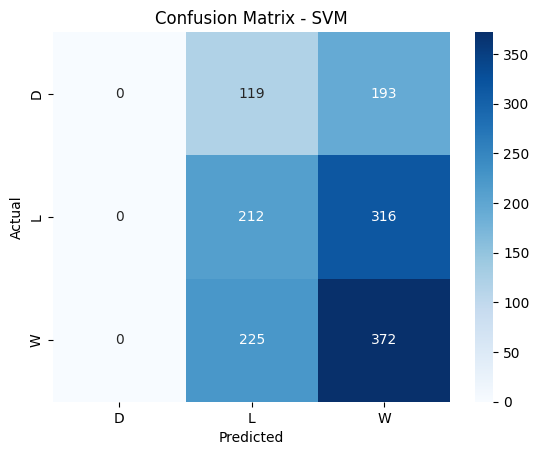

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("--- Support Vector Machine (SVM) ---")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN

--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.453027139874739
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.36      0.32       312
           1       0.47      0.48      0.47       528
           2       0.57      0.48      0.52       597

    accuracy                           0.45      1437
   macro avg       0.44      0.44      0.44      1437
weighted avg       0.47      0.45      0.46      1437



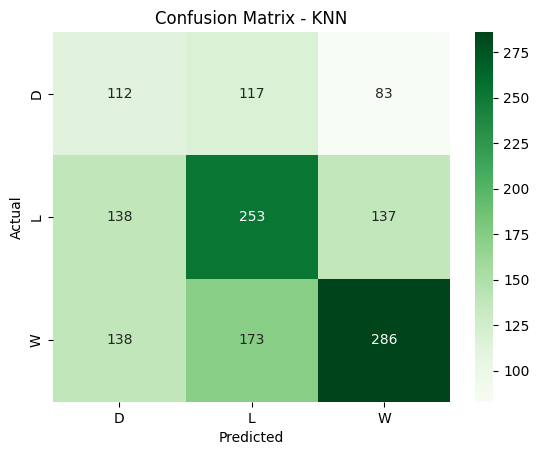

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate KNN model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("--- K-Nearest Neighbors (KNN) ---")
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree

--- Decision Tree ---
Accuracy: 0.5685455810716771
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.45      0.44       312
           1       0.57      0.62      0.59       528
           2       0.65      0.59      0.62       597

    accuracy                           0.57      1437
   macro avg       0.55      0.55      0.55      1437
weighted avg       0.57      0.57      0.57      1437



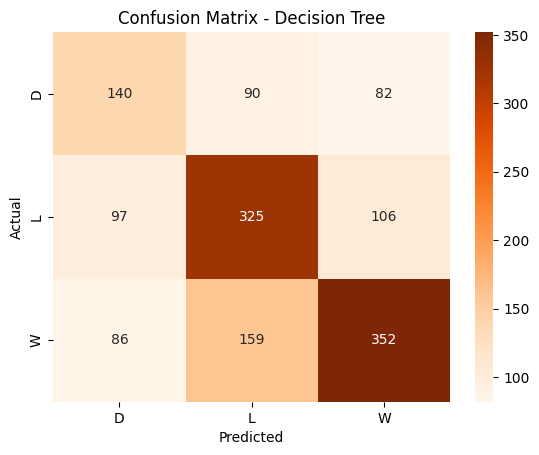

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("--- Decision Tree ---")
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Oranges", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Linear Classification

--- Linear Classification ---
Accuracy: 0.36882393876130826
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.03      0.05       312
           1       0.37      0.96      0.53       528
           2       0.42      0.03      0.05       597

    accuracy                           0.37      1437
   macro avg       0.38      0.34      0.21      1437
weighted avg       0.38      0.37      0.23      1437



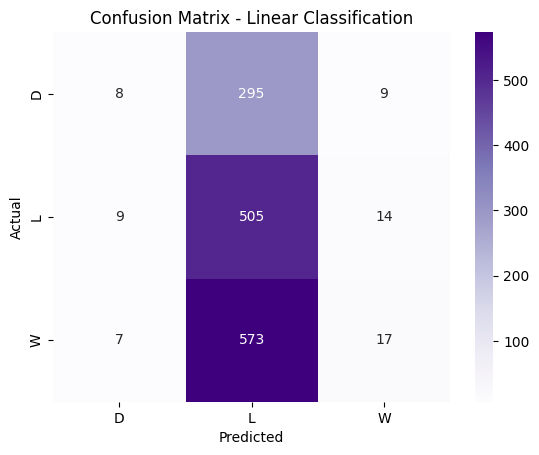

In [15]:
from sklearn.linear_model import SGDClassifier

# Initialize and train the Linear Classification model
linear_classifier = SGDClassifier(loss="hinge", max_iter=1000)
linear_classifier.fit(X_train, y_train)

# Predict and evaluate Linear Classification model
y_pred_linear = linear_classifier.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("--- Linear Classification ---")
print("Accuracy:", accuracy_linear)
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Purples", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix - Linear Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression

--- Logistic Regression ---
Accuracy: 0.441892832289492
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.42      0.57      0.49       528
           2       0.46      0.56      0.50       597

    accuracy                           0.44      1437
   macro avg       0.29      0.38      0.33      1437
weighted avg       0.35      0.44      0.39      1437



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


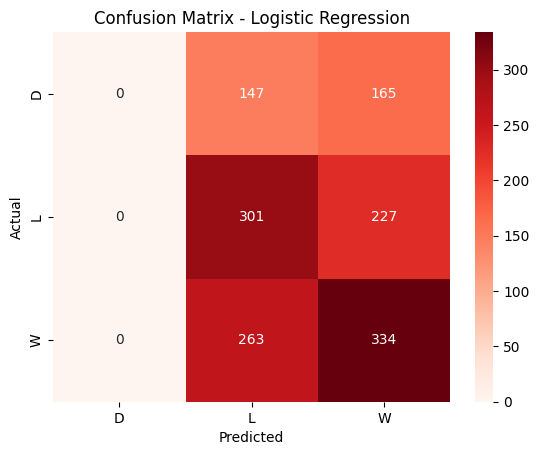

In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Reds", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best Implementation

In [17]:
# Store accuracies in a dictionary
accuracies = {
    "SVM": accuracy_svm,
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Linear Classification": accuracy_linear,
    "Logistic Regression": accuracy_logistic
}

# Find the best model
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"\n--- Best Model ---")
print(f"Best Model: {best_model}")
print(f"Accuracy: {best_accuracy:.2f}")


--- Best Model ---
Best Model: Decision Tree
Accuracy: 0.57
